In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction as frac

### Hybrid Prefrential Attachment function

In [2]:
def Hybrid_Prefrential_Attachment(g, n, m0, alpha):
    # specifying number of added edges in each time slot
    m = m0 - 1

    for i in range(m0 + 1, n + 1):
        # generating adding new node to the network 
        g.add_node(i)
        # finding degree value for each node
        degrees = nx.degree(g)
        # empty dictionary for node probabilities
        node_prob = {}

        # here we want to find out the summation of degrees in network
        s = 0
        for j in degrees:
            s += j[1]

        # generating probability of each node base on their degrees (richer-get-richer) 
        # and adding them to the dictionary for prefrential attachment method
        # probability(i) = deg(i)/sum(deg_network)
        for each in g.nodes():
            node_prob[each] = (float)(degrees[each]) / s

        node_probabilities_cum = []
        prev = 0

        for n, p in node_prob.items():
            temp = [n, prev + p]
            node_probabilities_cum.append(temp)
            prev += p

        new_edges = []
        num_edges_added = 0
        # saving target nodes in a list to avoid multi-edge
        target_nodes = []

        # prefrential attachment part
        # ======================================================================================
        # we must add (1-alpha)*m edges for each newborn node base on prefrential attachment approach
        while (num_edges_added < (1-alpha)*m):
            prev_cum = 0
            r = random.random()
            k = 0

            while (not (r > prev_cum and r <= node_probabilities_cum[k][1])):
                prev_cum = node_probabilities_cum[k][1]
                k = k + 1
            target_node = node_probabilities_cum[k][0]

            if target_node in target_nodes:
                continue

            else:
                target_nodes.append(target_node)
            g.add_edge(i, target_node)
            num_edges_added += 1
            new_edges.append((i, target_node))

        # mixing random part
        # ======================================================================================
        # we must add (alpha*m) edges for each newborn node base on mixing random approach
        num_edges_added_mixing_random = 0

        while (num_edges_added_mixing_random < alpha*m):
            x = random.choice(list(g.nodes))
            if x in target_nodes:
                continue
                
            else:
                target_nodes.append(x)
            g.add_edge(i, x)
            num_edges_added_mixing_random += 1
            new_edges.append((i, target_node))
            
    return g

### Degree distribution ploting function

In [3]:
def plot_deg_dist(g, m, alpha, N):
    # first we generate PDF
    all_degrees = []

    for i in nx.degree(g):
        all_degrees.append(i[1])
    unique_degrees = list(set(all_degrees))
    unique_degrees.sort()
    count_of_degrees = []

    # calculating frequency of each unique degree in network for PDF
    for i in unique_degrees:
        c = all_degrees.count(i)
        count_of_degrees.append(c)

    # here we calculate CDF base on PDF that we generate earlier 
    prob_of_degrees = []
    for i in count_of_degrees:
        prob_of_degrees.append(i/sum(count_of_degrees))
    cdf = np.cumsum(prob_of_degrees)

    # cumulative function base on exact solution in slide 6 (page 12)
    F = []
    for i in range(min(unique_degrees), max(unique_degrees)):
        F.append(1-(((m + ((2*alpha*m)/(1-alpha)))/(i + ((2*alpha*m)/(1-alpha))))**(2/(1-alpha)))) 

    plt.plot(unique_degrees, cdf)
    plt.plot(range(min(unique_degrees), max(unique_degrees)), F)
    plt.xlabel('Degrees')
    plt.ylabel('Probability')
    plt.title(r'$\lambda$' + ' = ' + str(frac(alpha).limit_denominator(10)) + ' and t = ' + str(N))
    plt.legend(['CDF with code (part a)', 'CDF with formula (part b)'])
    plt.show()

### Hybrid Prefrential Attachment model for a complete graph with 11 nodes and m = 10

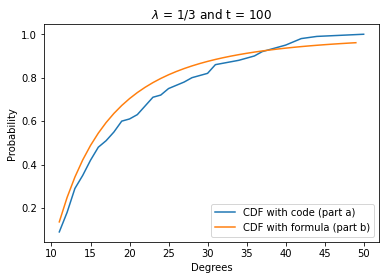

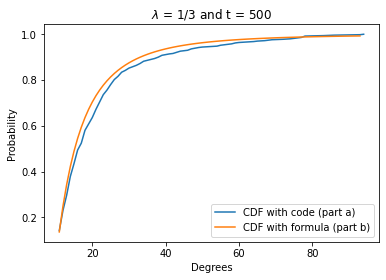

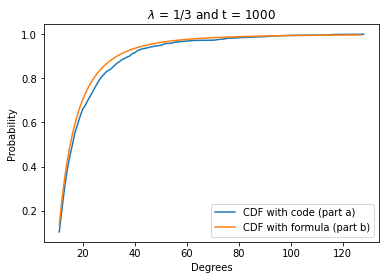

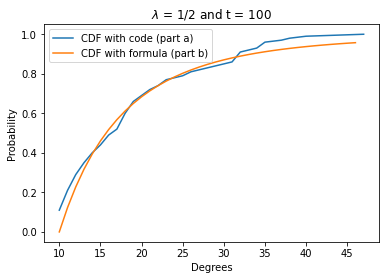

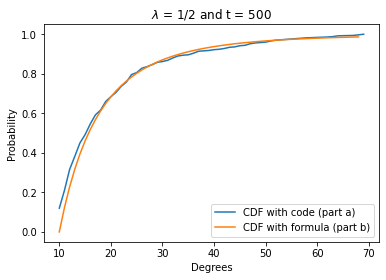

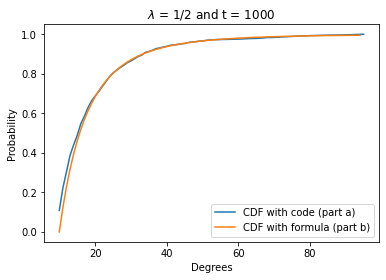

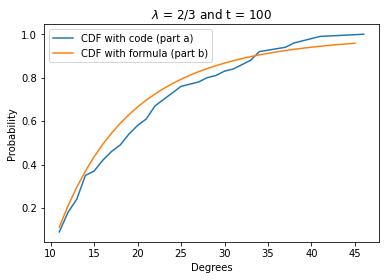

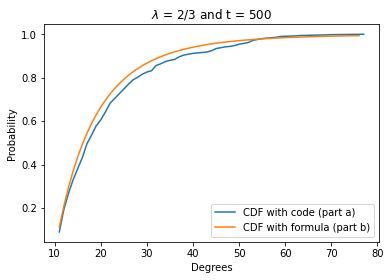

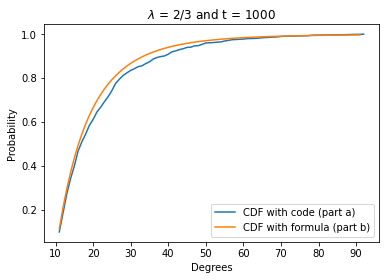

In [4]:
m0 = 11
Alpha = [1/3,1/2,2/3]
time = [100,500,1000]
for alpha in Alpha:
    for t in time:
        # we start procedure from a 11 node completre graph 
        g = nx.complete_graph(m0)
        g = Hybrid_Prefrential_Attachment(g, t, m0, alpha)
        plot_deg_dist(g, m0-1, alpha, t)